# GARMENTS WORKERS' PRODUCTIVITY PROJECT

### PROBLEM STATEMENT

To analyse the data of garments workers productivity using ML techniques and draw useful insights from it.

### IMPORTING PRODUCTION IMAGE

In [2]:
from IPython.display import Image

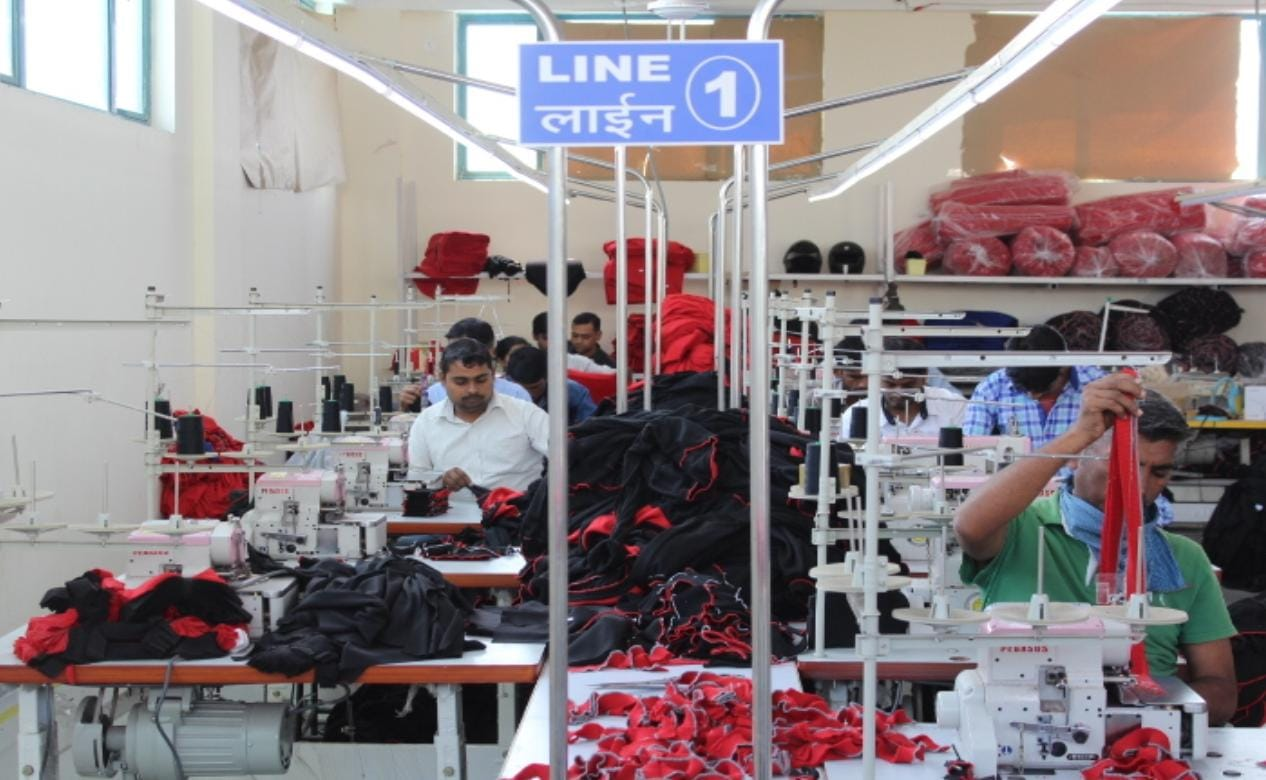

In [3]:
Image(r'C:\Users\chpra\OneDrive\Desktop\garments_workers_productivity_project\GARMENTS_PRODUCTION_IMAGE.jpg')

### IMPORTING NECESSARY LIBRARIES

In [4]:
# Linear Algebra
import numpy as np
# Data Processing
import pandas as pd
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# graphs within particular jupyter notebook
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### IMPORTING DATASET

In [5]:
df=pd.read_csv(r'C:\Users\chpra\OneDrive\Desktop\garments_workers_productivity_project\garments_worker_productivity.csv')
#'r' before the path string is used to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"

### DATA OVERVIEW

In [6]:
# TOP 5 ROW
df.head(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428


In [7]:
# BOTTOM 5 ROWS
df.tail()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.9,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.9,NaN,1800,0,0.0,0,0,15.0,0.505889
1196,3/11/2015,Quarter2,finishing,Wednesday,6,0.70,2.9,NaN,720,0,0.0,0,0,6.0,0.394722


In [8]:
# ROWS & COLUMNS
df.shape

(1197, 15)

In [9]:
# SIZE(ROWS X COLUMNS)
df.size

17955

### Basic Statistical Details

5 point summary (Min, Max, Q1 (25%), Q2,(Median or 50%), Q3 (75%)), Count, Mean(Average), Standard Deviation of continuous & discrete variable

Q1 = 1st Quartile or 25th Percentile

Q2 = 2nd Quartile or 50th Percentile or Median - half of the data below this point and rest half above this point

Q3 = 3rd Quartile or 75th Percentile

In [10]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [11]:
df.describe(include='all')
# Include all shows Unique, Top & Frequency of string data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197,1197,1197,1197,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
unique,59,5,3,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1/31/2015,Quarter1,sweing,Wednesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,360,691,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,NaN,NaN,NaN,NaN,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,NaN,NaN,NaN,NaN,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,NaN,NaN,NaN,NaN,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,NaN,NaN,NaN,NaN,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,NaN,NaN,NaN,NaN,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253


### Information About the Data

In [12]:
# Data information like - Rows(Range Index), Columns, Columns Name, Null Values, Data Type & memory Usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

The dataset has 1197 rows and 15 columns (14 features + the target variable (actual_productivity)). 5 of the features are floats, 5 are integers and 4 are objects. It is also clear that the dataset has missing values in wip column.

### Attribute Information

#### BASIC ANALYSIS ABOUT THE DATA

In [13]:
#ALL COLUMN NAMES
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [14]:
# Unique values in day column
df['day'].unique()

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

In [15]:
# Number of unique values
df['day'].nunique()

6

###### With the above result we can determine that the weekly off day is "Friday"

In [16]:
df.department.unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

###### 2 observations from above:-
1. sweing spelling is wrong while the correct spelling is sewing
2. same department showing twice because of white space

In [17]:
# Replacing sweing to sewing
df['department']=df['department'].replace('sweing','sewing')

In [18]:
# Removing white space from finishing
df['department']=df['department'].str.strip()

In [19]:
# No. of rows where department is sewing
df['department'].where(df['department']=='sewing').count()

691

In [20]:
df['date'] = pd.to_datetime(df['date'])
df['month_name'] = df['date'].dt.month_name() # To create month name

In [21]:
df.drop('date',axis=1, inplace=True) # No we'll drop the date column

### EDA(Exploratory Data Analysis)

1.EDA – plays a critical role in understanding the what, why, and how of the problem statement. It’s first in the order of operations that a data analyst will perform when handed a new data source and problem statement.

2.Exploratory Data Analysis is an approach to analyzing data sets by summarizing their main characteristics with visualizations. The EDA process is a crucial step prior to building a model in order to unravel various insights that later become important in developing a robust algorithmic model.

3.Different operations where EDA comes into play:

 a. First and foremost, EDA provides a stage for breaking down problem statements into smaller experiments which can help understand the dataset

 b. EDA provides relevant insights which help us to make key business decisions

 c. The EDA step provides a platform to run all thought experiments and ultimately guides us towards making a critical decision.

#### There are 7 steps involved to clean and prepare the data for building predictive model

1.Variable Identification

2.Univariate Analysis

3.Bivariate Analysis

4.Missing values treatment

5.Outlier treatment

6.Feature Engineering - Variable transformation & Variable creation

### Step 1: Variable Identification
1.To understand the variables and the type of data for each variable

2.We need to identify predictor variables, target variable, data types of variables and categories of variables

##### Dependent & Independent Variables

DEPENDENT VARIABLE OR TARGET VARIABLE (VARIABLE THAT IS BEING PREDICT)-
actual_productivity

INDEPENDENT VARIABLE OR PREDICTOR VARIABLE (THESE ARE USED TO PREDICT THE DEPENDENT VARIABLE)-
1. date
2. quarter
3. department
4. day
5. team
6. targeted_productivity
7. smv
8. wip
9. over_time
10. incentive
11. idle_time
12. idle_men
13. no_of_style_change
14. no_of_workers

The thing that is able to vary is called varibale.

##### Data Types-

Object(Numeric + String (SEQUENCE OF CHARACTERS))-
1. date               
2. quarter               
3. department           
4. day                   

##### Numeric(IT CONTAINS NUMERICAL VALUES)-Integers(NO Decimals)+Float(Have Decimals):

1. team                   
2. targeted_productivity  
3. smv                    
4. wip                  
5. over_time              
6. incentive                
7. idle_time              
8. idle_men                
9. no_of_style_change      
10. no_of_workers            

##### Variables Categories:

Categorical Variable(It classifies categories):- date, quarter, department, day

Continuous Variable(Reply of How Much):- idle_time, incentive, over_time, smv, targeted_productivity

Discrete Variable(Reply of How many):- no_of_workers, no_of_style_change, idle_men, wip, team

### Step 2: Univariate Analysis
Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so we analyze one variable at one time

It doesn’t deal with causes or relationships among variables but mostly to describe and summarize and find patterns in the data

Used to highlight missing and outlier values

Method to perform univariate analysis depends on whether the variable type is categorical, discrete or continuous

#### BOX PLOT &  HISTOGRAM OF NUMERICAL VARIABLES-

<AxesSubplot:>

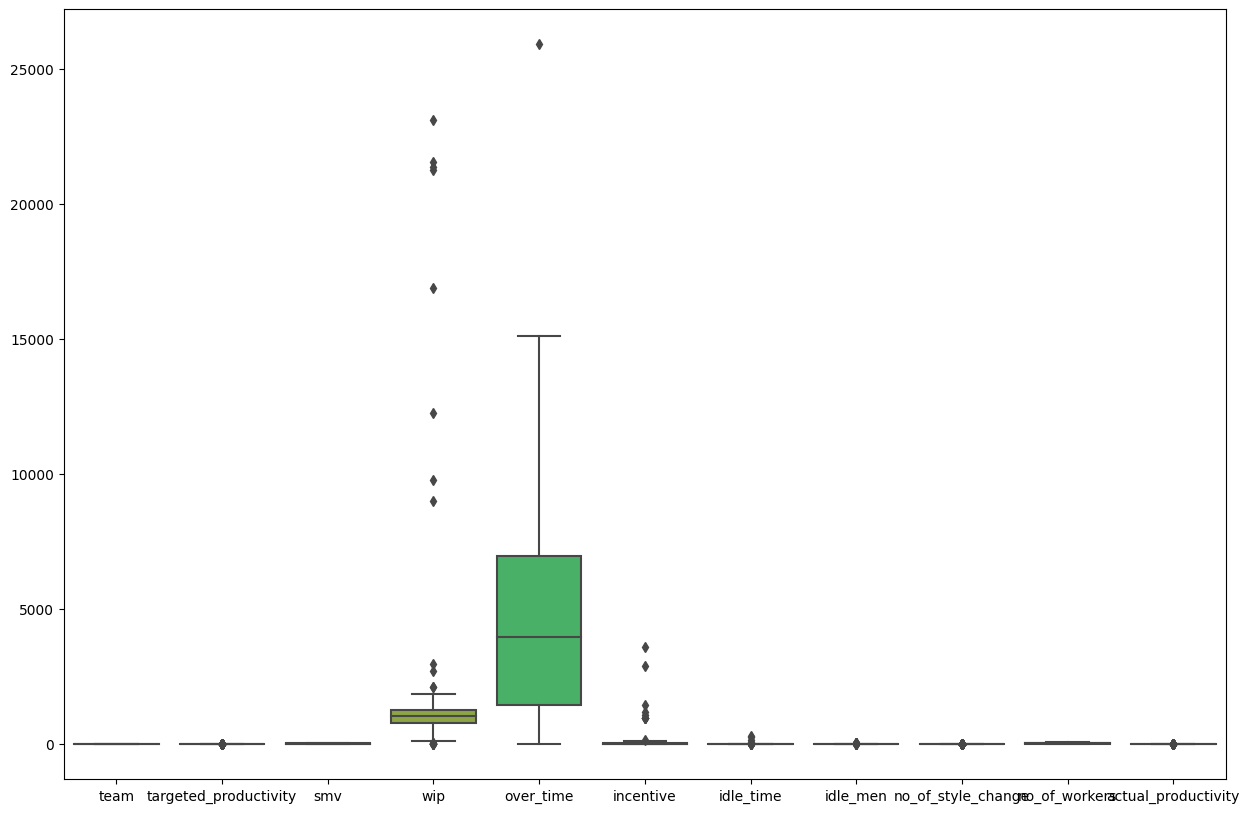

In [22]:
plt.figure(figsize=(15,10))
sns.boxplot(df)

###### It can be seen with the help of Box Plots that most of the variables have outlier, we can see one or more data point beyond the whiskers of the box plots, which can be denoted as outliers. Hence, this visual representation can be used to detect outliers.

Text(0.5, 1.0, 'targeted_productivity_histogram')

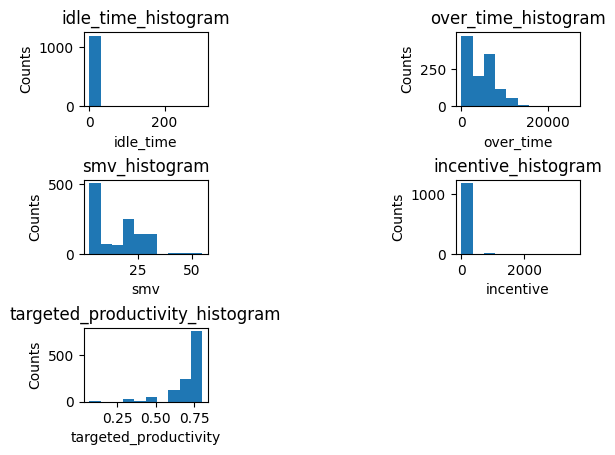

In [23]:
plt.subplot(3,2,1) # no. of rows, columns, index of subplot
plt.hist(x='idle_time', data=df)
plt.xlabel('idle_time')
plt.ylabel('Counts')
plt.title('idle_time_histogram')

plt.subplots_adjust(wspace=2, hspace=1) # space between the subplots

plt.subplot(3,2,2) 
plt.hist(x='over_time', data=df)
plt.xlabel('over_time')
plt.ylabel('Counts')
plt.title('over_time_histogram')

plt.subplot(3,2,3)
plt.hist(x='smv', data=df)
plt.xlabel('smv')
plt.ylabel('Counts')
plt.title('smv_histogram')

plt.subplot(3,2,4) 
plt.hist(x='incentive', data=df)
plt.xlabel('incentive')
plt.ylabel('Counts')
plt.title('incentive_histogram')

plt.subplot(3,2,5) 
plt.hist(df['targeted_productivity'])
plt.xlabel('targeted_productivity')
plt.ylabel('Counts')
plt.title('targeted_productivity_histogram')

###### By using the hostogram we can see how the data is distributed in each variable and which pattern they are following.

#### Categorical Variables - UNIVARIATE ANALYSIS
Frequency table is used to understand the distribution of each category under a variable, we can produce count/frequency and count% against each category, Count plot or Bar plot could be used to visualize the Frequency Table.

In [24]:
pd.crosstab(df['quarter'],columns='count')

col_0,count
quarter,
Quarter1,360
Quarter2,335
Quarter3,210
Quarter4,248
Quarter5,44


<AxesSubplot:xlabel='quarter'>

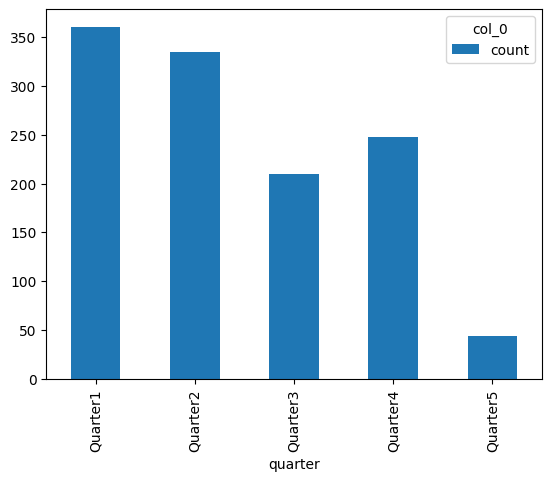

In [25]:
pd.crosstab(df['quarter'],columns='count').plot(kind='bar')

<AxesSubplot:xlabel='department', ylabel='count'>

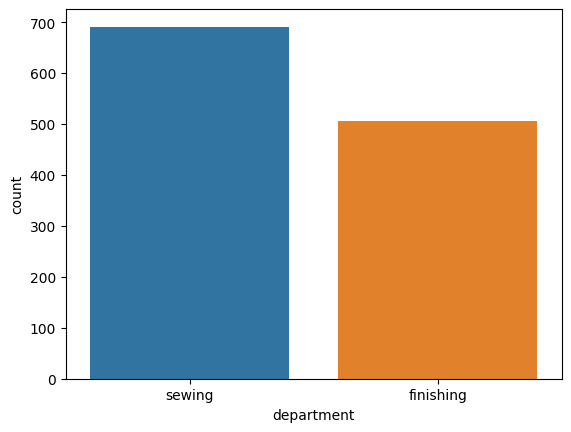

In [26]:
sns.countplot(x='department', data=df)

<AxesSubplot:xlabel='day', ylabel='count'>

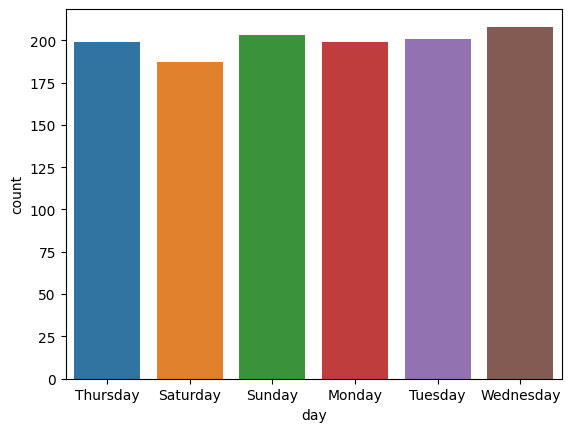

In [27]:
sns.countplot(x='day', data=df)

### Step 2: Bivariate Analysis

To find the relation between 2 variables we need to perform bivariate analysis.

Different methods are used to tackle different combinations during analysis process-
1. Categorical & Categorical
2. Categorical & Numerical
3. Numerical & Numerical

#### NUMERICAL & NUMERICAL
SCATTER PLOT - FIND OUT THE RELATIONSHIP B/W 2 VARIABLES BUT DOES NOT INDICATE THE STRENGTH OF RELATIONSHIP AMONGST THEM.

HEAT MAP - CORRELATION (TO FIND THE STRENGTH OF THE RELATIONSHIP, WE USE CORRELATION AMONG NUMERICAL VALUES)

(+1 POSITIVE LINEAR CORRELATION,-1 NEGATIVE LINEAR CORRELATION & 0 IS NO CORRELATION)

THE RELATIONSHIP CAN BE LINEAR OR NON LINEAR

#### CATEGORICAL & CATEGORICAL
STACKED BAR PLOT - THIS METHOD IS THE MOST VISUAL FORM OF 2 WAY TABLE

COUNT PLOT - SAME LIKE BAR PLOT

TWO WAY TABLE - TABLE COUNT & COUNT% BOTH ROW & COLUMN REPRESENT CATEGORY OF THEIR RESPECTIVE VARIABLES.

CHI-SQUARE TEST (TO TEST RELATIONSHIP BETWEEN VARIABLES)

If H0 (Null-Hypothesis) is fail to reject it means no relationship b/w variables and variables are independent.

#### CATEGORICAL & NUMERICAL
WHILE EXPLORING RELATIONSHIP B/W CATEGORICAL & CONTINUOUS VARIABLES, WE CAN USE VIOLIN/SWARM PLOT.

VIOLIN PLOT - LOOKS LIKE VIOLIN

#### SCATTER PLOT & CORRELATION FOR NUMERICAL VALUES

In [28]:
df.corr()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
team,1.000000,0.030274,-0.110011,-0.033474,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753
targeted_productivity,0.030274,1.000000,-0.069489,0.062054,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,-0.110011,-0.069489,1.000000,-0.037837,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
wip,-0.033474,0.062054,-0.037837,1.000000,0.022302,0.167210,-0.026299,-0.048718,-0.072357,0.030383,0.131147
over_time,-0.096737,-0.088557,0.674887,0.022302,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,-0.007674,0.032768,0.032629,0.167210,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,0.003796,-0.056181,0.056863,-0.026299,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851
idle_men,0.026974,-0.053818,0.105901,-0.048718,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734
no_of_style_change,-0.011194,-0.209294,0.315388,-0.072357,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366
no_of_workers,-0.075113,-0.084288,0.912176,0.030383,0.734164,0.049222,0.058049,0.106946,0.327787,1.000000,-0.057991


<AxesSubplot:>

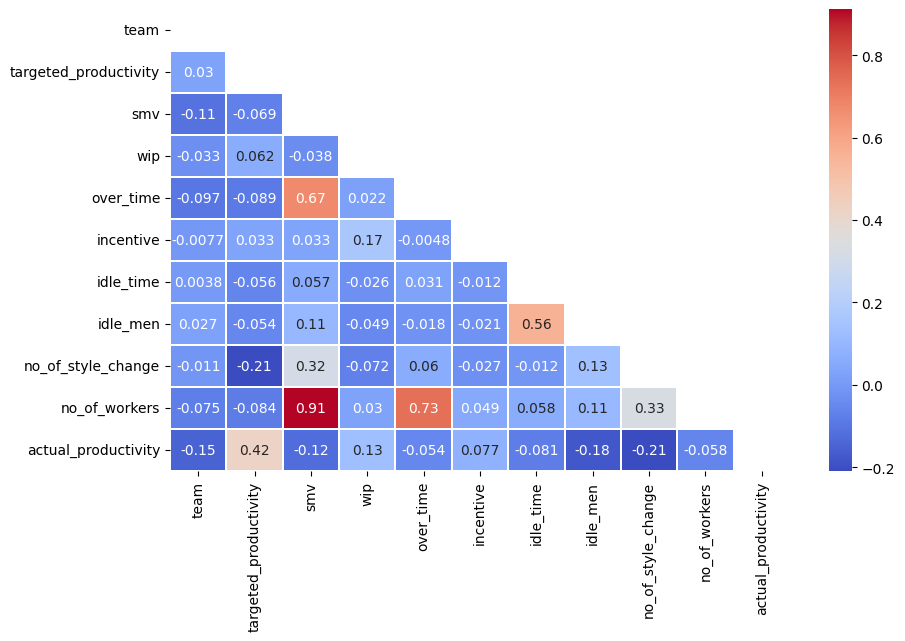

In [29]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, linewidth=0.1, cmap='coolwarm', mask=mask)
#annot is used to show the values inside the matrix
#linewidth is used to give the space b/w the matrix
# mask is used to remove upper half

###### As we can see that no_of_workers and smv is highly correlated, and no_of_workers is also more than +0.70 correlated to over_time, so will drop this feature/column to avoid multi collinearity problem.

<AxesSubplot:xlabel='no_of_workers', ylabel='smv'>

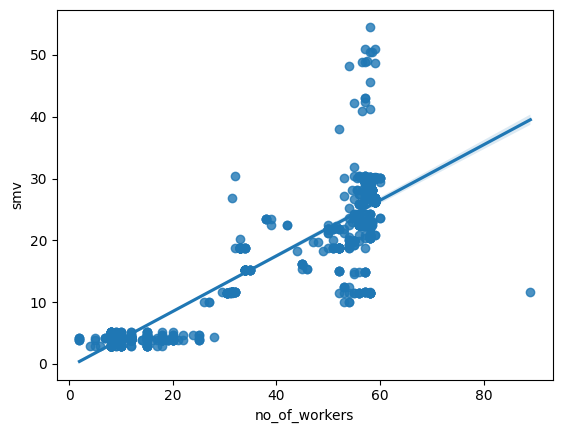

In [30]:
sns.regplot(data=df, x='no_of_workers', y='smv')

In [31]:
del df['no_of_workers']

##### BAR PLOT (STACKED), COUNT PLOT & TWO WAY TABLE FOR Categorical & Categorical Variables

1. quarter
2. department
3. day
4. date

<AxesSubplot:xlabel='quarter'>

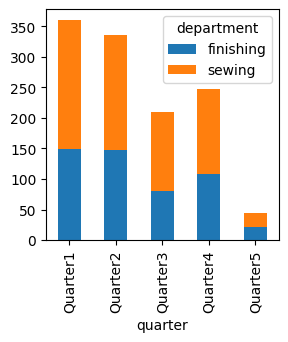

In [32]:
pd.crosstab(df['quarter'],df['department']).plot(kind='bar', stacked=True, figsize=(3,3))
# Stacked is used for stacked graph

<AxesSubplot:xlabel='day', ylabel='count'>

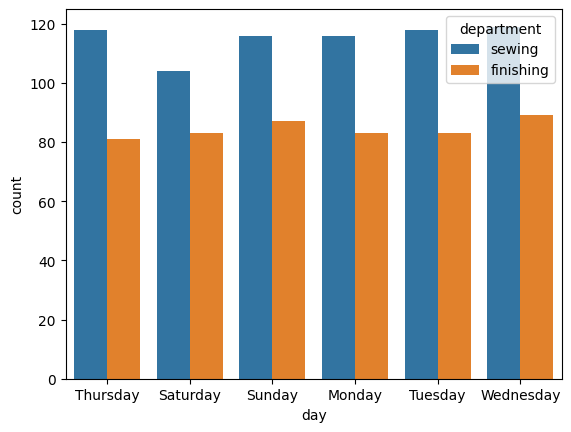

In [33]:
sns.countplot(x='day', data=df,hue='department')
# hue is used for colour appearance parameter

<AxesSubplot:xlabel='month_name', ylabel='actual_productivity'>

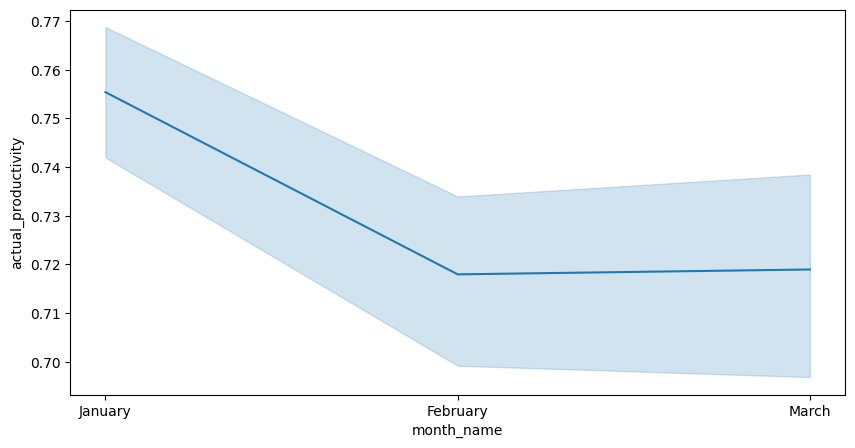

In [34]:
plt.figure(figsize=(10,5))
sns.lineplot(x='month_name',y='actual_productivity',data=df)

In [35]:
# Department & Team wise strength of workers 
df.groupby(['department','team'], axis=0).size()
# 0 for rows
# by default axis=0

department  team
finishing   1       49
            2       52
            3       37
            4       46
            5       35
            6       35
            7       41
            8       53
            9       46
            10      43
            11      29
            12      40
sewing      1       56
            2       57
            3       58
            4       59
            5       58
            6       59
            7       55
            8       56
            9       58
            10      57
            11      59
            12      59
dtype: int64

In [36]:
pd.crosstab([df.team,df.department],df.day,margins=True ).style.background_gradient(cmap='summer_r')

#### Numerical & Categorical
CATPLOT - It shows the relationship between a numerical and one or more categorical variables using one of several visual representations. The kind parameter selects the underlying axes-level function to use:

Categorical Plots Like - POINT (FACTORPLOT), STRIP (CATPLOT), SWARM, BOX, VIOLIN, BOXEN, BAR, COUNT)

HEIGHT AND ASPECT ARE USED FOR PLOT SIZE

CATPLOT -

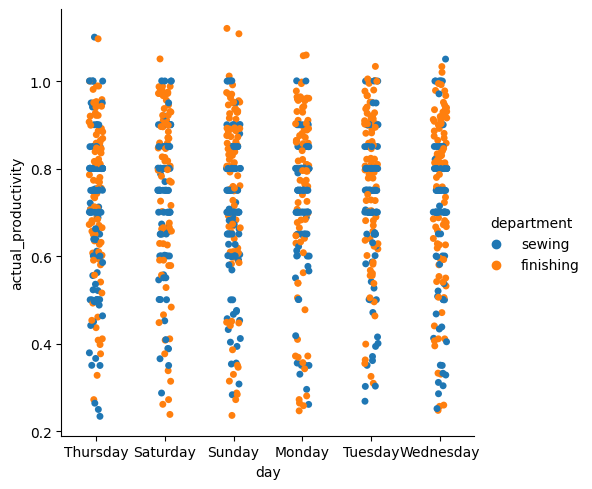

In [37]:
sns.catplot(x='day',y='actual_productivity',hue='department',data=df)

<AxesSubplot:xlabel='quarter', ylabel='actual_productivity'>

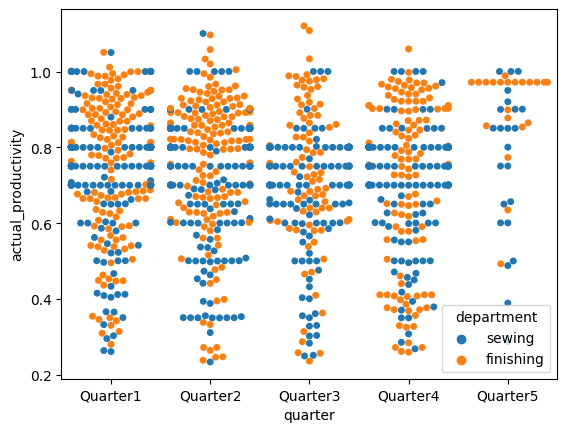

In [38]:
sns.swarmplot(x='quarter',y='actual_productivity',hue='department',data=df)

###### Lowest production happened in the 5th Quarter

### Step 4: Missing Values Treatment
1.As we have already noticed that there are missing values in dataset.

2.Missing Data will not make any impact on the result if its percentage is less than 1%, if missing data’s range within the range of 1-5% then it is somehow manageable; however in case of 5-15% complex techniques are used for handling the problems of missing data but if it exceeds from 15% then it will surely hinder the result achieved after applying data mining techniques

3.Handling such values is very important as this could lead to wrong results

4.Missing values could occur due to several reasons like,

a. – During data extraction i.e. while fetching the data required for the analysis

b. – During data collection itself there could be some fields for which the values may not have been collected.

5.But there are ways to handle these problems

In [39]:
# null values in the data set
df.isnull().sum()

quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
actual_productivity        0
month_name                 0
dtype: int64

In [40]:
df.isnull().sum()*100/len(df)
# Percentage of missing values

quarter                   0.000000
department                0.000000
day                       0.000000
team                      0.000000
targeted_productivity     0.000000
smv                       0.000000
wip                      42.272348
over_time                 0.000000
incentive                 0.000000
idle_time                 0.000000
idle_men                  0.000000
no_of_style_change        0.000000
actual_productivity       0.000000
month_name                0.000000
dtype: float64

#### 1. Deletion: Deleting observations or variables.
If a particular variable is having more missing values than rest of the variables in the dataset, then we are better off without that variable unless it is a really important predictor that makes a lot of business sense.

Also, if in a huge dataset we have very minute number of observations missing, then we can delete the whole of observations altogether.

#### 2. Single Imputation: In single imputation, we use mean, median or mode.
If the variable is numeric then replace the missing values with either mean, median or mode.

If the variable is otherwise generally normally distributed (and in particular does not have any skewness), we would choose mean.

If the data skewed, median imputation is suggested.

If the variable is categorical then we could replace the missing values with the most frequent occurring value in that variable, i.e the mode.

<AxesSubplot:xlabel='wip', ylabel='Density'>

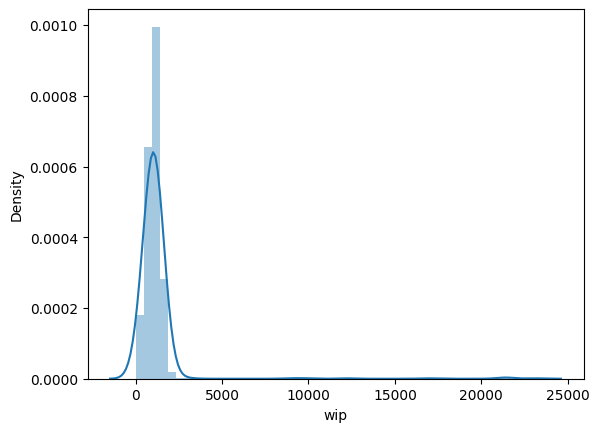

In [41]:
# To check how the data is distributed
sns.distplot(df['wip'])

###### Data is positively skewed and have outliers, so we'll fill the missing values with median

In [42]:
df['wip'].fillna(df['wip'].median(), inplace=True)

In [43]:
df['wip'].describe()

count     1197.000000
mean      1126.437761
std       1397.653191
min          7.000000
25%        970.000000
50%       1039.000000
75%       1083.000000
max      23122.000000
Name: wip, dtype: float64

### Step 5: Outliers
##### What is an Outlier?
1.Outlier is an observation that appears far away and diverges from an overall pattern in a sample.

2.Outliers can drastically change the results of the data analysis and statistical modeling. There are numerous unfavorable impacts of outliers in the data set:

a. It increases the error variance and reduces the power of statistical tests

b. If the outliers are non-randomly distributed, they can decrease normality

c. They can bias or influence estimates that may be of substantive interest

##### Causes of Outliers:
1.Data Entry Errors - Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.

2.Measurement Error - When the measurement instrument used turns out to be faulty.

3.Intentional Error - This is commonly found in self-reported measures that involves sensitive data.

4.Data Processing Error - When data is collected from different sources

5.Sampling Error - Data considered which is not part of the sample

6.Natural Outlier - When an outlier is not artificial (due to error), it is a natural outlier.

##### Outlier Detection
1.Outliers can be detected using boxplots and scatter plots

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'team'),
  Text(1, 0, 'targeted_productivity'),
  Text(2, 0, 'smv'),
  Text(3, 0, 'wip'),
  Text(4, 0, 'over_time'),
  Text(5, 0, 'incentive'),
  Text(6, 0, 'idle_time'),
  Text(7, 0, 'idle_men'),
  Text(8, 0, 'no_of_style_change'),
  Text(9, 0, 'actual_productivity')])

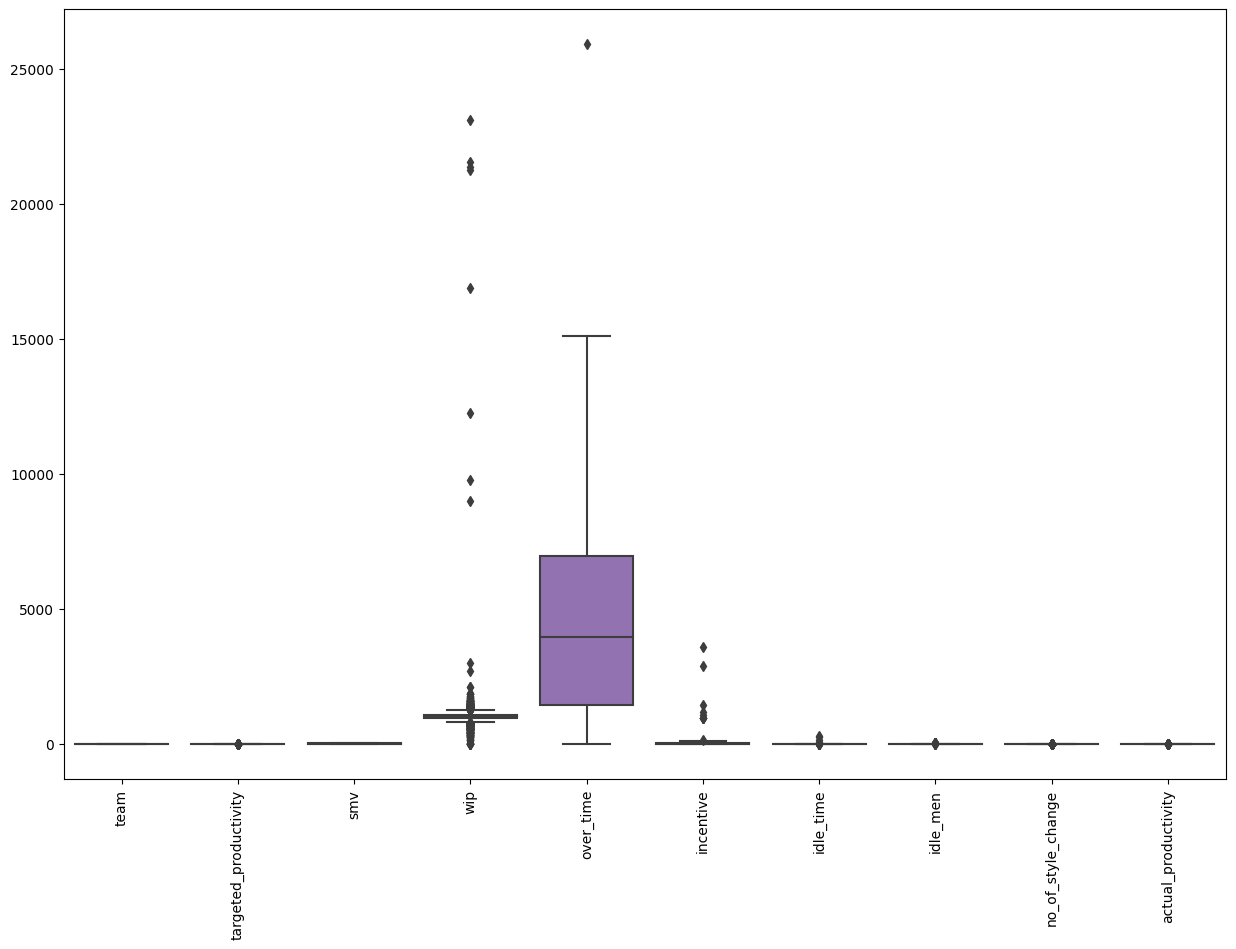

In [44]:
plt.figure(figsize=(15,10))
sns.boxplot(df,orient='v',width=0.8)
plt.xticks(rotation=90)

##### Other than the plots, Outliers can also be detected by using certain thumb rules,
1.– Any value, which is below the range of Q1-1.5x IQR and above the range of Q3+1.5 x IQR where IQR = Q3-Q1

2.– Any value which out of range of 5th and 95th percentile can be considered as outlier

3.– Data points, three or more standard deviation away from mean are considered outlier

###### It's clear that outliers are present in most of the features but these outliers are seems like Natural outliers.

### 6. FEATURE ENGINEERING

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [46]:
for i in range(0, df.shape[1]):
    if df.dtypes[i]=='object':
        df[df.columns[i]] = le.fit_transform(df[df.columns[i]])

In [47]:
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,actual_productivity,month_name
0,0,1,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,0.940725,1
1,0,0,3,1,0.75,3.94,1039.0,960,0,0.0,0,0,0.886500,1
2,0,1,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,0.800570,1
3,0,1,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,0.800570,1
4,0,1,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,0.800382,1


# Building Machine Learning Models
Now we will train several Machine Learning models and compare their results.

### STEP 1: DEFINING VARIABLES X AND Y

In [48]:
X=df.drop('actual_productivity', axis=1)
# values convert into array
# vector is one dimensional

In [49]:
X.shape

(1197, 13)

In [50]:
y=df['actual_productivity']

In [51]:
y.shape

(1197,)

### STEP 2: SPLIT THE MODEL

In [52]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30, random_state=0)

Test size is generally considered b/w 20 to 33%

Test size is directly proportional to accuracy

random_state=0, so that the result may not change each time we run the code.

In [53]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### STEP 3 & 4 & 5: BUILD, PREDICT & EVALUATE THE MODEL

### FINDING THE BEST MODEL-

In [54]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
# Creating a List of Regression Models
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Random Forest Regression', RandomForestRegressor())
]

In [56]:
# Looping Over Models
for name, model in models:
# Fitting the model on the training data
    model.fit(X_train, y_train)
    
    # Making predictions on the test data
    y_pred = model.predict(X_test)
    
    # Evaluating the model's performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("\n")

Model: Linear Regression
Mean Squared Error: 0.021414386784110256
R-squared: 0.2580044411802547


Model: Ridge Regression
Mean Squared Error: 0.02140949593246439
R-squared: 0.2581739062336631


Model: Lasso Regression
Mean Squared Error: 0.028892021209337388
R-squared: -0.0010910720339334379


Model: Decision Tree Regression
Mean Squared Error: 0.030926494208878462
R-squared: -0.07158433179508994


Model: Random Forest Regression
Mean Squared Error: 0.01627558795531408
R-squared: 0.43606071461340945




###### Out of these 5 models Random Forest Regression  is performing well.

###### But to increase the r2_score and reduce the mse we'll also try one more ensemble technique with hyperperameteres

In [57]:
#pip install xgboost
# Creating the XGBoost model with hyperparameters 
import xgboost as xgb
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # 'reg:squarederror' for regression tasks
    n_estimators=100,             # Number of boosting rounds (trees)
    max_depth=3,                  # Maximum depth of each tree
    learning_rate=0.1,            # Step size shrinkage for boosting
    random_state=42               # Random seed for reproducibility
)

# Fitting the model to the training data
xgb_model.fit(X_train, y_train)

# Predicting on the test data
y_pred = xgb_model.predict(X_test)

# Calculating Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 0.015124361457428506
R-squared: 0.4759500169426517


In [58]:
y_pred

array([0.7892224 , 0.8566249 , 0.79832363, 0.7094763 , 0.5558394 ,
       0.7350085 , 0.80194384, 0.7429062 , 0.60729057, 0.7637668 ,
       0.76924145, 0.75461626, 0.49779865, 0.7509325 , 0.47006235,
       0.75122434, 0.6555369 , 0.5539067 , 0.6303501 , 0.6418684 ,
       0.6760721 , 0.76277924, 0.54376435, 0.78527236, 0.7231889 ,
       0.8417457 , 0.75966835, 0.7712215 , 0.88177353, 0.7750938 ,
       0.8027657 , 0.60776305, 0.78609157, 0.6564473 , 0.82638687,
       0.7593908 , 0.82958686, 0.677248  , 0.710997  , 0.814432  ,
       0.6744456 , 0.84177   , 0.848116  , 0.7378585 , 0.7404696 ,
       0.78520644, 0.8272509 , 0.78181577, 0.8217424 , 0.5612597 ,
       0.80752414, 0.7642312 , 0.8027247 , 0.69006246, 0.6713712 ,
       0.7897322 , 0.986872  , 0.8213562 , 0.78266186, 0.6994792 ,
       0.66939366, 0.7875187 , 0.8397615 , 0.7875051 , 0.6223622 ,
       0.7543355 , 0.65695775, 0.68359566, 0.7792302 , 0.7466626 ,
       0.6414512 , 0.72572327, 0.82424814, 0.68385166, 0.48197

In [59]:
y_test.shape

(360,)

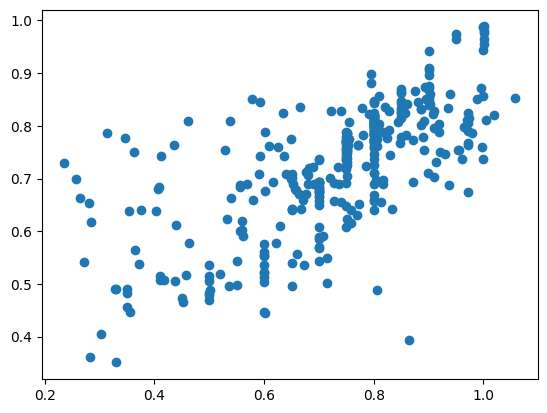

In [60]:
# Scatter plot for prediction
plt.scatter(y_test,y_pred)

In [61]:
# Errors are residuals
residuals=y_test-y_pred

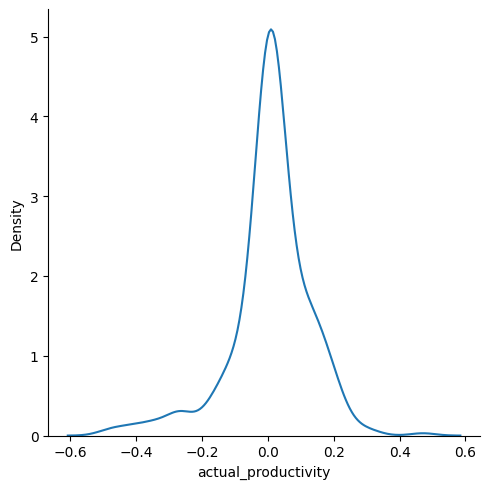

In [62]:
# Plotting the residuals
sns.displot(residuals, kind='kde')

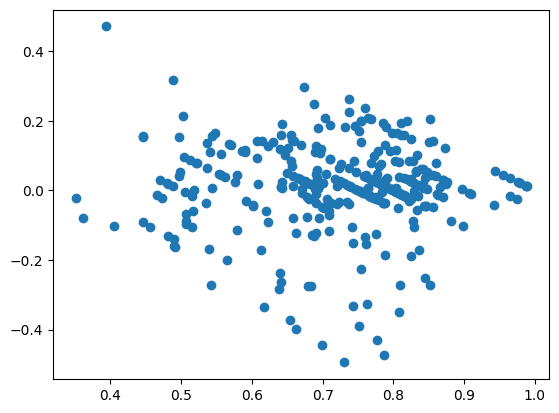

In [63]:
# Scatter plot of prediction and residuals
plt.scatter(y_pred,residuals)

In [75]:
#prediction
# If given data not scaled
# pickled_model.predict(scaler.transform(X_test[0].reshape(1,-1)))

## If given data scaled
pickled_model.predict(X_test[0].reshape(1,-1)) # In this case the given data is already scaled

array([0.7892224], dtype=float32)

### Pickling The Model File for Deployment

In [64]:
import pickle

In [69]:
#pickle.dump(scaler,open('scaling.pkl','wb'))

In [70]:
#pickle.dump(xgb_model,open('xgbmodel.pkl','wb'))

In [71]:
pickled_model=pickle.load(open('xgbmodel.pkl','rb'))